In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import Set1
import os
import h5py
import json


%matplotlib inline

In [4]:
# image to numpy array
im = Image.open("./datasets/grayscale_maps/iso.2600.png", 'r')

array = np.asarray(im)

plt.imshow(array, cmap='gray')
plt.axis('off')
plt.show()

IOError: [Errno 2] No such file or directory: './datasets/grayscale_maps/iso.2600.png'

In [3]:
# Having a stack of images as a numpy array
original_dataset_dir = "./datasets/grayscale_maps/"

fnames = [original_dataset_dir + 'iso.{}.png'.format(i) for i in range(2600, 2850)]

dst = np.zeros((250, 250, 250))

for i, fname in enumerate(fnames):
    src = os.path.join(original_dataset_dir, fname)
    image = Image.open(fname, 'r')
    array = np.asarray(image)
    dst[:, :, i] += array    

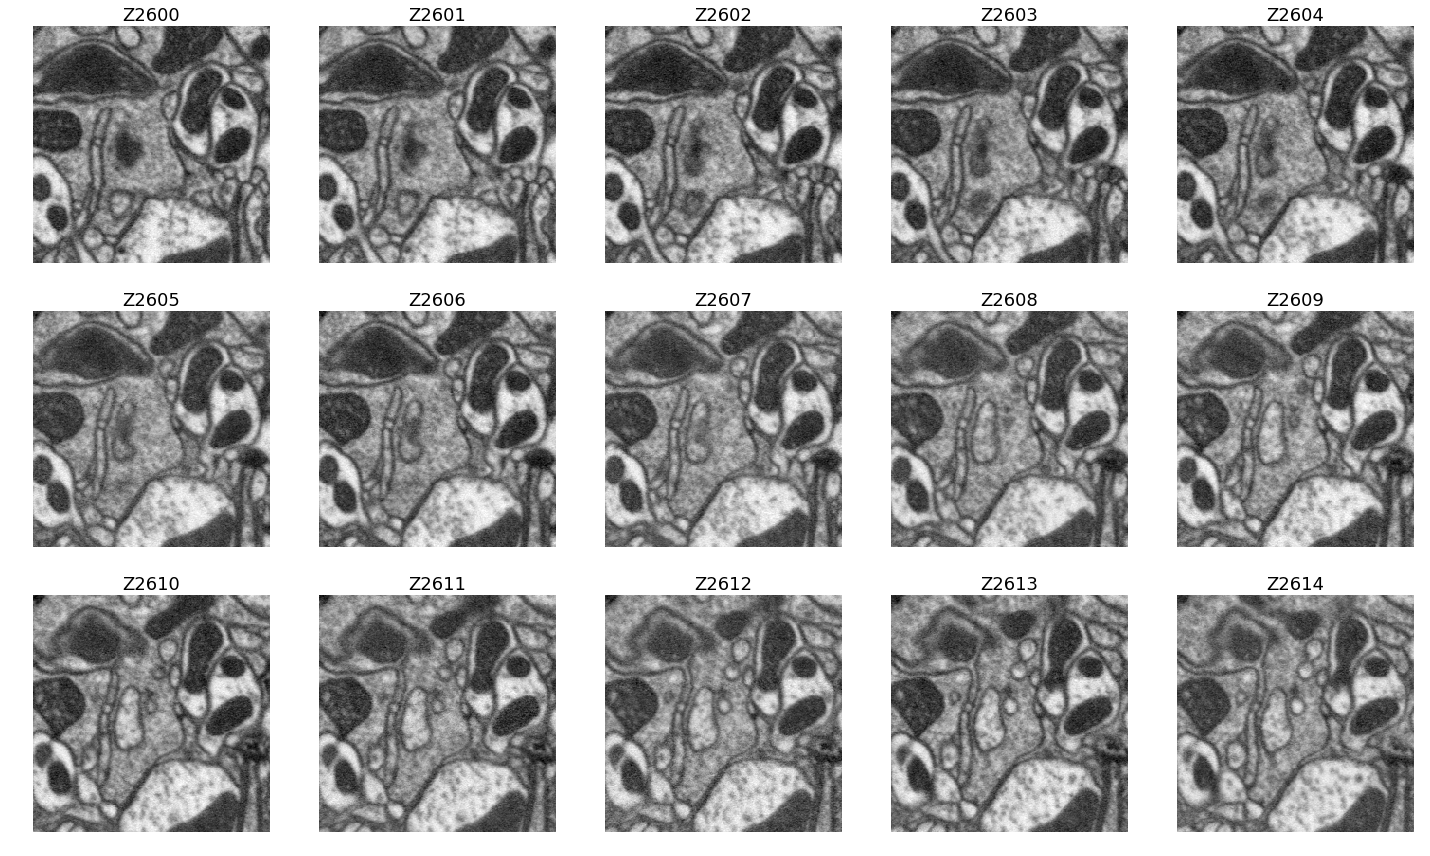

In [4]:
# Plotting several images from the array
plt.figure(figsize=(20, 12))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(dst[:, :, i], cmap='gray')
    plt.axis('off')
    plt.title('Z{}'.format(2600+i), fontsize=18)
    
plt.tight_layout()
plt.show()

In [5]:
h5 = h5py.File('./datasets/groundtruth.h5', 'r')
print(h5['stack'].shape)
print(h5['transforms'].shape) # What?

(250, 250, 250)
(21317, 2)


In [6]:
transforms = h5['transforms'].value
gt = h5['stack'].value.T

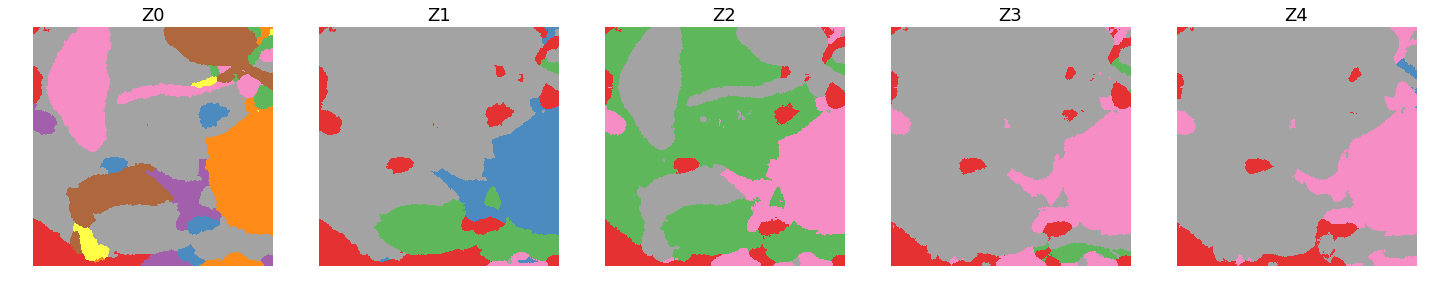

In [7]:
# Plotting several images from the array
plt.figure(figsize=(20, 12))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(gt[:, :, i], cmap=plt.cm.get_cmap('Set1'), alpha=0.9)
    plt.axis('off')
    plt.title('Z{}'.format(i), fontsize=18)
    
plt.tight_layout()
plt.show()

In [37]:
os.getcwd()

'/home/haein/PycharmProjects/fira-capstone-project'

In [40]:
with open('/media/haein/DATA/FlyEM/roi.JSON', 'r') as f:
    data = json.load(f)
    
roi = np.array(data)
roi

IOError: [Errno 2] No such file or directory: '/media/haein/DATA/FlyEM/roi.JSON'

In [11]:
z = roi[0, 0]
y = roi[0, 1]
x_0 = roi[0, 2]
x_1 = roi[0, 3]

In [21]:
chunk = roi[131]
chunk_start = chunk * 32
chunk_end = chunk_start + 32

In [22]:
chunk_start, chunk_end

(array([1760, 3456, 2720, 4768]), array([1792, 3488, 2752, 4800]))

In [23]:
chunk

array([ 55, 108,  85, 149])

In [5]:
from diced import DicedStore

In [6]:
store = DicedStore("gs://flyem-public-connectome")
repo = store.open_repo("medulla7column")
arr = repo.get_array("grayscale")